In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import linalg
import time

from sklearn.decomposition import dict_learning_online
from sklearn.decomposition import sparse_encode

from sklearn.decomposition._dict_learning_na import sparse_encode_na,\
                                            update1, dict_learning_na,\
                                            update_dict_na


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from sklearn.decomposition.bench_dict_learning import *

sparse encode took:	 0.0031992435455322266 seconds
sparse encode_na took:	 0.007112956047058106 seconds
sparse encode took:	 0.06233179569244385 seconds
sparse encode_na took:	 0.10562748908996582 seconds
sparse encode took:	 0.6069157600402832 seconds
sparse encode_na took:	 1.0539651393890381 seconds
sparse encode took:	 5.567625284194946 seconds
sparse encode_na took:	 9.635975790023803 seconds


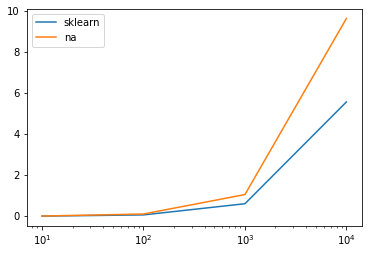

In [26]:
bench_sparse_encode()

dict_learning took:	 0.27498674392700195 seconds
dict_learning_na took:	 11.930563688278198 seconds
dict_learning took:	 0.2643735408782959 seconds
dict_learning_na took:	 12.897932291030884 seconds
dict_learning took:	 0.7391872406005859 seconds
dict_learning_na took:	 15.538289785385132 seconds
dict_learning took:	 5.3126232624053955 seconds
dict_learning_na took:	 14.6966233253479 seconds


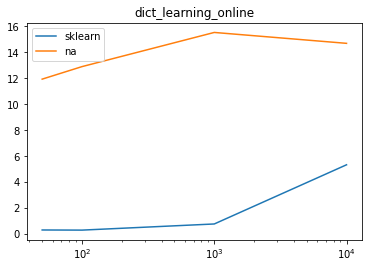

In [27]:
bench_dict_learning()

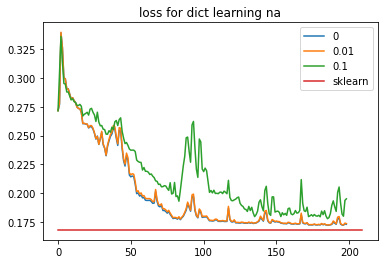

In [28]:
bench_loss()